In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocess

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import skimage
from skimage.transform import resize

import os
import torch
import torch.nn as nn
import torchvision
from torchvision import models
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [8]:
# !unzip -uq "/content/drive/My Drive/ASL_Data.zip"
!unzip -o "/content/drive/My Drive/ASL_Data.zip" | awk 'BEGIN {ORS=" "} {if(NR%10==0)print "."}'

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [3]:
batch_size = 10
imageSize = 76
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = '/content/ASL_Data/asl_alphabet_train/asl_alphabet_train/'

In [4]:
def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int64)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y

In [5]:
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


In [7]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 76, 76, 3)
The shape of y_train is :  (87000,)


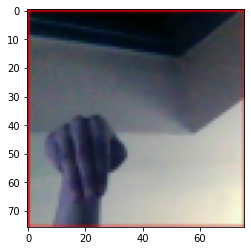

In [8]:
plt.imshow(X_train[0])
plt.show()

In [6]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_train, y_train, test_size=0.4,random_state=42,stratify=y_train)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5,random_state=42,stratify=y_val_test)

In [7]:
y_cat_train = to_categorical(y_train,29)
y_cat_val = to_categorical(y_val, 29)
y_cat_test = to_categorical(y_test,29)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_val.shape)
print(y_cat_test.shape)

(52200, 76, 76, 3)
(52200,)
(17400, 76, 76, 3)
(17400,)
(17400, 76, 76, 3)
(17400,)
(52200, 29)
(17400, 29)
(17400, 29)


(76, 76, 3)
22


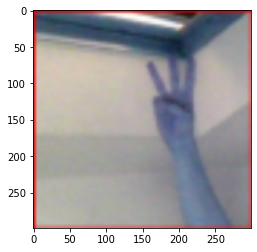

In [12]:
print(X_train[0].shape)

image = cv2.resize(X_train[0], (299, 299))

plt.imshow(image)
print(y_train[0])

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

In [9]:
from keras.engine import training
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications

## Inception Feature Extraction

In [10]:
base_model = tf.keras.applications.InceptionV3(weights='imagenet', 
                                               include_top=False,
                                               input_shape=(76, 76, 3))
base_model.trainable = False
nclass = 29

In [14]:
inception = Model(inputs=base_model.input, 
                  outputs=base_model.get_layer('mixed3').output)

feature_extraction = Sequential()
feature_extraction.add(inception)
feature_extraction.add(Flatten())
feature_extraction.add(Dense(nclass, activation='softmax'))

feature_extraction.compile(loss='categorical_crossentropy', 
                           optimizer=keras.optimizers.Adam(learning_rate=0.01), 
                           metrics=['accuracy'])

feature_extraction.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 3, 3, 768)         2146976   
                                                                 
 flatten_1 (Flatten)         (None, 6912)              0         
                                                                 
 dense (Dense)               (None, 29)                200477    
                                                                 
Total params: 2,347,453
Trainable params: 200,477
Non-trainable params: 2,146,976
_________________________________________________________________


In [14]:
file_path="/content/best_model.h5"

# checkpoint = ModelCheckpoint(file_path, monitor='acc', verbose=1, save_best_only=True, mode='max')
mc = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, mode='min', save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

callbacks_list = [es, mc] #early

In [17]:
feature_extraction.fit(x=X_train,
                      y=y_cat_train,
                      validation_data=(X_val, y_cat_val),
                      batch_size=16,
                      epochs=30, 
                      shuffle=True,
                      verbose=2,
                      callbacks=callbacks_list)

Epoch 1/30

Epoch 1: val_loss improved from inf to 2.36362, saving model to /content/best_model.h5
3263/3263 - 20s - loss: 1.9428 - accuracy: 0.9655 - val_loss: 2.3636 - val_accuracy: 0.9595 - 20s/epoch - 6ms/step
Epoch 2/30

Epoch 2: val_loss improved from 2.36362 to 1.02367, saving model to /content/best_model.h5
3263/3263 - 21s - loss: 1.5258 - accuracy: 0.9751 - val_loss: 1.0237 - val_accuracy: 0.9820 - 21s/epoch - 6ms/step
Epoch 3/30

Epoch 3: val_loss improved from 1.02367 to 0.63740, saving model to /content/best_model.h5
3263/3263 - 21s - loss: 1.2984 - accuracy: 0.9800 - val_loss: 0.6374 - val_accuracy: 0.9882 - 21s/epoch - 6ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 0.63740
3263/3263 - 20s - loss: 1.2905 - accuracy: 0.9817 - val_loss: 1.0510 - val_accuracy: 0.9830 - 20s/epoch - 6ms/step
Epoch 5/30

Epoch 5: val_loss improved from 0.63740 to 0.53139, saving model to /content/best_model.h5
3263/3263 - 20s - loss: 1.1724 - accuracy: 0.9850 - val_loss: 0.5314 - va

In [ ]:
inception_fe1 = [2.3636, 1.0237, 0.6374, 1.0510, 0.5314, 4.8568, 4.8568, 0.5650, 3.5857, 0.4880, 0.3121, 0.3981, 2.0405, 2.2349, 0.1437, 1.1933, 0.7234, 0.4185, 1.1352, 0.9176, 0.3220, 0.1585, 0.7052, 0.3162, 0.1748]

In [18]:
score = feature_extraction.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 4s 7ms/step - loss: 0.3275 - accuracy: 0.9967
Accuracy for test images: 99.672 %


In [12]:
inception = Model(inputs=base_model.input, 
                  outputs=base_model.get_layer('mixed7').output)

feature_extraction = Sequential()
feature_extraction.add(inception)
feature_extraction.add(Flatten())
feature_extraction.add(Dense(nclass, activation='softmax'))

feature_extraction.compile(loss='categorical_crossentropy', 
                           optimizer=keras.optimizers.Adam(learning_rate=0.01), 
                           metrics=['accuracy'])

feature_extraction.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 3, 3, 768)         8975264   
                                                                 
 flatten (Flatten)           (None, 6912)              0         
                                                                 
 dense (Dense)               (None, 29)                200477    
                                                                 
Total params: 9,175,741
Trainable params: 200,477
Non-trainable params: 8,975,264
_________________________________________________________________


In [15]:
feature_extraction.fit(x=X_train,
                      y=y_cat_train,
                      validation_data=(X_val, y_cat_val),
                      batch_size=16,
                      epochs=30, 
                      shuffle=True,
                      verbose=2,
                      callbacks=callbacks_list)

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.76080, saving model to /content/best_model.h5
3263/3263 - 45s - loss: 1.5454 - accuracy: 0.8785 - val_loss: 0.7608 - val_accuracy: 0.9481 - 45s/epoch - 14ms/step
Epoch 2/30

Epoch 2: val_loss improved from 0.76080 to 0.46017, saving model to /content/best_model.h5
3263/3263 - 39s - loss: 0.6996 - accuracy: 0.9570 - val_loss: 0.4602 - val_accuracy: 0.9695 - 39s/epoch - 12ms/step
Epoch 3/30

Epoch 3: val_loss improved from 0.46017 to 0.38998, saving model to /content/best_model.h5
3263/3263 - 39s - loss: 0.5066 - accuracy: 0.9726 - val_loss: 0.3900 - val_accuracy: 0.9809 - 39s/epoch - 12ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 0.38998
3263/3263 - 37s - loss: 0.4387 - accuracy: 0.9795 - val_loss: 1.2342 - val_accuracy: 0.9556 - 37s/epoch - 11ms/step
Epoch 5/30

Epoch 5: val_loss improved from 0.38998 to 0.32309, saving model to /content/best_model.h5
3263/3263 - 37s - loss: 0.3812 - accuracy: 0.9832 - val_loss: 0.3231 

In [ ]:
inception_fe2 = [0.7608, 0.4602, 0.3900, 1.2342, 0.3231, 0.9467, 0.1396, 0.2668, 0.3990, 0.5478, 0.0984, 0.7547, 0.2338, 0.1298, 0.1642, 0.1407, 0.2471, 0.1437, 0.2240, 0.1446, 0.1672]

In [16]:
score = feature_extraction.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 7s 13ms/step - loss: 0.1322 - accuracy: 0.9963
Accuracy for test images: 99.632 %


In [17]:
inception = Model(inputs=base_model.input, 
                  outputs=base_model.get_layer('mixed9_0').output)

feature_extraction = Sequential()
feature_extraction.add(inception)
feature_extraction.add(Flatten())
feature_extraction.add(Dense(nclass, activation='softmax'))

feature_extraction.compile(loss='categorical_crossentropy', 
                           optimizer=keras.optimizers.Adam(learning_rate=0.01), 
                           metrics=['accuracy'])

feature_extraction.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 1, 1, 768)         12054560  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 29)                22301     
                                                                 
Total params: 12,076,861
Trainable params: 22,301
Non-trainable params: 12,054,560
_________________________________________________________________


In [19]:
feature_extraction.fit(x=X_train,
                      y=y_cat_train,
                      validation_data=(X_val, y_cat_val),
                      batch_size=16,
                      epochs=30, 
                      shuffle=True,
                      verbose=2,
                      callbacks=callbacks_list)

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.38288, saving model to /content/best_model.h5
3263/3263 - 50s - loss: 0.6065 - accuracy: 0.8240 - val_loss: 0.3829 - val_accuracy: 0.8794 - 50s/epoch - 15ms/step
Epoch 2/30

Epoch 2: val_loss improved from 0.38288 to 0.30682, saving model to /content/best_model.h5
3263/3263 - 47s - loss: 0.2873 - accuracy: 0.9100 - val_loss: 0.3068 - val_accuracy: 0.9003 - 47s/epoch - 15ms/step
Epoch 3/30

Epoch 3: val_loss improved from 0.30682 to 0.27090, saving model to /content/best_model.h5
3263/3263 - 47s - loss: 0.2258 - accuracy: 0.9277 - val_loss: 0.2709 - val_accuracy: 0.9129 - 47s/epoch - 15ms/step
Epoch 4/30

Epoch 4: val_loss improved from 0.27090 to 0.26951, saving model to /content/best_model.h5
3263/3263 - 47s - loss: 0.1980 - accuracy: 0.9355 - val_loss: 0.2695 - val_accuracy: 0.9151 - 47s/epoch - 14ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 0.26951
3263/3263 - 47s - loss: 0.1721 - accuracy: 0.9442 - val_loss: 0.2784 

In [19]:
inception_fe3 = [0.3676, 0.2993, 0.2748, 0.2683, 0.2715, 0.2471, 0.2809, 0.2545, 0.2586, 0.2856, 0.2849, 0.2792, 0.2801, 0.2796, 0.2967, 0.2948]

In [20]:
score = feature_extraction.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 8s 15ms/step - loss: 0.2876 - accuracy: 0.9274
Accuracy for test images: 92.741 %


## VGG16

In [21]:
base_model = tf.keras.applications.VGG16(weights='imagenet', 
                                    include_top=False, 
                                    input_shape=(76, 76,3))
base_model.trainable = False

inputs = keras.Input(shape=(76,76,3))
x = data_augmentation(inputs)

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(nclass, activation='softmax')(x)
model = keras.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 76, 76, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 76, 76, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 29)                14877     
                                                                 
Total params: 14,729,565
Trainable params: 14,877
Non-traina

In [ ]:
file_path="/content/best_model.h5"

# checkpoint = ModelCheckpoint(file_path, monitor='acc', verbose=1, save_best_only=True, mode='max')
mc = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, mode='min', save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

callbacks_list = [es, mc] #early


In [ ]:
model.fit(x=X_train,
          y=y_cat_train,
          validation_data=(X_val, y_cat_val),
          batch_size=32,
          epochs=30, 
          shuffle=True, 
          verbose=2,
          callbacks=callbacks_list)

In [16]:
vgg_loss = [1.7572, 1.3727, 1.1815, 1.0704, 0.9933, 0.9286, 0.8818, 0.8435, 0.8132, 0.7917, 0.7734, 0.7515, 0.7269, 0.7259, 0.7073, 0.6938, 0.6851, 0.6713, 0.6692, 0.6626, 0.6525, 0.6395, 0.6318, 0.6301, 0.6086, 0.6120, 0.6147, 0.6100, 0.6044, 0.5925]
vgg_acc = [0.5866, 0.6645, 0.7047, 0.7250, 0.7417, 0.7557, 0.7658, 0.7731, 0.7801, 0.7809, 0.7838, 0.7888, 0.7936, 0.7957, 0.7934, 0.8004, 0.7997, 0.8062, 0.8044, 0.8034, 0.8086, 0.8146, 0.8137, 0.8127, 0.8197, 0.8179, 0.8126, 0.8170, 0.8199, 0.8223]

In [19]:
score = model.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 13s 24ms/step - loss: 0.5856 - accuracy: 0.8257
Accuracy for test images: 82.575 %


## VGG Fine Tuning

In [27]:
model.layers[2].trainable = True
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 76, 76, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 76, 76, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 29)                14877     
                                                                 
Total params: 14,729,565
Trainable params: 14,729,565
Non-trainable params: 0
_______________________________________________

In [28]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [29]:
score = model.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Pretrain make sure: Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 13s 24ms/step - loss: 0.5856 - accuracy: 0.8257
Pretrain make sure: Accuracy for test images: 82.575 %


In [ ]:
file_path="/content/best_model.h5"

# checkpoint = ModelCheckpoint(file_path, monitor='acc', verbose=1, save_best_only=True, mode='max')
mc = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, mode='min', save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

callbacks_list = [es, mc] #early

In [30]:
model.fit(x=X_train,
          y=y_cat_train,
          validation_data=(X_val, y_cat_val),
          batch_size=32,
          epochs=10, 
          shuffle=True, 
          verbose=2,
          callbacks=callbacks_list)

Epoch 1/10

Epoch 1: val_loss improved from 0.59253 to 0.06947, saving model to /content/best_model.h5
1632/1632 - 128s - loss: 0.2436 - accuracy: 0.9212 - val_loss: 0.0695 - val_accuracy: 0.9772 - 128s/epoch - 78ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.06947 to 0.03214, saving model to /content/best_model.h5
1632/1632 - 127s - loss: 0.0699 - accuracy: 0.9778 - val_loss: 0.0321 - val_accuracy: 0.9885 - 127s/epoch - 78ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.03214 to 0.02396, saving model to /content/best_model.h5
1632/1632 - 128s - loss: 0.0431 - accuracy: 0.9857 - val_loss: 0.0240 - val_accuracy: 0.9922 - 128s/epoch - 78ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.02396 to 0.01751, saving model to /content/best_model.h5
1632/1632 - 128s - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0175 - val_accuracy: 0.9939 - 128s/epoch - 78ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.01751 to 0.00622, saving model to /content/best_model.h5
1632/1632 - 1

In [ ]:
vgg_ft = [0.0695, 0.0321, 0.0240, 0.0175, 0.0062, 0.0127, 0.0054, 0.0059, 0.0052, 0.0025]

In [31]:
score = model.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Pretrain make sure: Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 13s 24ms/step - loss: 0.0029 - accuracy: 0.9990
Pretrain make sure: Accuracy for test images: 99.902 %


## VGG Feature Extraction

In [13]:
base_model = tf.keras.applications.VGG16(weights='imagenet', 
                                    include_top=False, 
                                    input_shape=(76, 76,3))
base_model.trainable = False
nclass = 29

In [12]:
vgg = Model(inputs=base_model.input, 
            outputs=base_model.get_layer('block2_pool').output)

feature_extraction = Sequential()
feature_extraction.add(vgg)
feature_extraction.add(GlobalAveragePooling2D())
feature_extraction.add(Flatten())
feature_extraction.add(Dense(nclass, activation='softmax'))

feature_extraction.compile(loss='categorical_crossentropy', 
                           optimizer=keras.optimizers.Adam(learning_rate=0.01), 
                           metrics=['accuracy'])

feature_extraction.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 19, 19, 128)       260160    
                                                                 
 global_average_pooling2d_1   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 29)                3741      
                                                                 
Total params: 263,901
Trainable params: 3,741
Non-trainable params: 260,160
_________________________________________________________________


In [14]:
file_path="/content/best_model.h5"

# checkpoint = ModelCheckpoint(file_path, monitor='acc', verbose=1, save_best_only=True, mode='max')
mc = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, mode='min', save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

callbacks_list = [es, mc] #early

In [14]:
feature_extraction.fit(x=X_train,
                      y=y_cat_train,
                      validation_data=(X_val, y_cat_val),
                      batch_size=8,
                      epochs=30, 
                      shuffle=True,
                      verbose=2,
                      callbacks=callbacks_list)

Epoch 1/30

Epoch 1: val_loss improved from inf to 2.91959, saving model to /content/best_model.h5
6525/6525 - 41s - loss: 3.5101 - accuracy: 0.3461 - val_loss: 2.9196 - val_accuracy: 0.4176 - 41s/epoch - 6ms/step
Epoch 2/30

Epoch 2: val_loss improved from 2.91959 to 2.04898, saving model to /content/best_model.h5
6525/6525 - 31s - loss: 2.7789 - accuracy: 0.4905 - val_loss: 2.0490 - val_accuracy: 0.5480 - 31s/epoch - 5ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 2.04898
6525/6525 - 32s - loss: 2.4511 - accuracy: 0.5494 - val_loss: 2.1687 - val_accuracy: 0.5862 - 32s/epoch - 5ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 2.04898
6525/6525 - 32s - loss: 2.3275 - accuracy: 0.5829 - val_loss: 2.5096 - val_accuracy: 0.6157 - 32s/epoch - 5ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 2.04898
6525/6525 - 32s - loss: 2.2117 - accuracy: 0.6110 - val_loss: 4.8075 - val_accuracy: 0.4945 - 32s/epoch - 5ms/step
Epoch 6/30

Epoch 6: val_loss improved from 2.

In [ ]:
vgg_fe1 = [2.9196, 2.0490, 2.1687, 2.5096, 4.8075, 1.8934, 1.5038, 1.3918, 1.4602, 1.4357, 1.1953, 1.2655, 1.5201, 2.0422, 2.7007, 1.4836, 1.4557, 1.2607, 3.5298, 1.3522, 1.8049]

In [15]:
score = feature_extraction.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 8s 13ms/step - loss: 1.8354 - accuracy: 0.7186
Accuracy for test images: 71.856 %


In [15]:
vgg = Model(inputs=base_model.input, 
            outputs=base_model.get_layer('block3_pool').output)

feature_extraction = Sequential()
feature_extraction.add(vgg)
feature_extraction.add(GlobalAveragePooling2D())
feature_extraction.add(Dense(nclass, activation='softmax'))

feature_extraction.compile(loss='categorical_crossentropy', 
                           optimizer=keras.optimizers.Adam(learning_rate=0.01), 
                           metrics=['accuracy'])

feature_extraction.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 9, 9, 256)         1735488   
                                                                 
 global_average_pooling2d (G  (None, 256)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 29)                7453      
                                                                 
Total params: 1,742,941
Trainable params: 7,453
Non-trainable params: 1,735,488
_________________________________________________________________


In [17]:
feature_extraction.fit(x=X_train,
                      y=y_cat_train,
                      validation_data=(X_val, y_cat_val),
                      batch_size=8,
                      epochs=30, 
                      shuffle=True,
                      verbose=2,
                      callbacks=callbacks_list)

Epoch 1/30

Epoch 1: val_loss did not improve from 1.19526
6525/6525 - 56s - loss: 5.1679 - accuracy: 0.6162 - val_loss: 2.9293 - val_accuracy: 0.7527 - 56s/epoch - 9ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 1.19526
6525/6525 - 53s - loss: 3.5373 - accuracy: 0.7791 - val_loss: 4.6177 - val_accuracy: 0.7864 - 53s/epoch - 8ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.19526
6525/6525 - 53s - loss: 2.9825 - accuracy: 0.8301 - val_loss: 4.0248 - val_accuracy: 0.7916 - 53s/epoch - 8ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 1.19526
6525/6525 - 53s - loss: 2.4976 - accuracy: 0.8621 - val_loss: 3.0464 - val_accuracy: 0.9087 - 53s/epoch - 8ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.19526
6525/6525 - 53s - loss: 2.2774 - accuracy: 0.8777 - val_loss: 3.0521 - val_accuracy: 0.8707 - 53s/epoch - 8ms/step
Epoch 6/30

Epoch 6: val_loss improved from 1.19526 to 0.76607, saving model to /content/best_model.h5
6525/6525 - 53s - loss: 2.1

In [ ]:
vgg_fe2 = [2.9293, 4.6177, 4.0248, 3.0464, 3.0521, 0.7661, 1.9763, 1.5442, 1.7313, 1.0591, 1.3125, 0.6853, 1.6308, 2.9953, 0.7137, 0.3944, 1.5541, 1.9430, 0.7042, 1.0657, 0.4286, 1.3303, 0.2059, 1.4783, 0.6255, 2.7225, 0.5283, 0.6670, 3.9524, 1.1458]

In [17]:
score = feature_extraction.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 6s 10ms/step - loss: 1.3281 - accuracy: 0.9398
Accuracy for test images: 93.983 %


In [12]:
vgg = Model(inputs=base_model.input, 
            outputs=base_model.get_layer('block4_pool').output)

feature_extraction = Sequential()
feature_extraction.add(vgg)
feature_extraction.add(GlobalAveragePooling2D())
feature_extraction.add(Dense(nclass, activation='softmax'))

feature_extraction.compile(loss='categorical_crossentropy', 
                           optimizer=keras.optimizers.Adam(learning_rate=0.01), 
                           metrics=['accuracy'])

feature_extraction.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 4, 4, 512)         7635264   
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 29)                14877     
                                                                 
Total params: 7,650,141
Trainable params: 14,877
Non-trainable params: 7,635,264
_________________________________________________________________


In [13]:
feature_extraction.fit(x=X_train,
                      y=y_cat_train,
                      validation_data=(X_val, y_cat_val),
                      batch_size=8,
                      epochs=30, 
                      shuffle=True,
                      verbose=2,
                      callbacks=callbacks_list)

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.43401, saving model to /content/best_model.h5
6525/6525 - 91s - loss: 0.7466 - accuracy: 0.8582 - val_loss: 0.4340 - val_accuracy: 0.9296 - 91s/epoch - 14ms/step
Epoch 2/30

Epoch 2: val_loss improved from 0.43401 to 0.30335, saving model to /content/best_model.h5
6525/6525 - 87s - loss: 0.4147 - accuracy: 0.9395 - val_loss: 0.3034 - val_accuracy: 0.9526 - 87s/epoch - 13ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 0.30335
6525/6525 - 88s - loss: 0.3322 - accuracy: 0.9583 - val_loss: 0.4125 - val_accuracy: 0.9502 - 88s/epoch - 13ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 0.30335
6525/6525 - 88s - loss: 0.2634 - accuracy: 0.9681 - val_loss: 0.5565 - val_accuracy: 0.9434 - 88s/epoch - 13ms/step
Epoch 5/30

Epoch 5: val_loss improved from 0.30335 to 0.15415, saving model to /content/best_model.h5
6525/6525 - 88s - loss: 0.2245 - accuracy: 0.9739 - val_loss: 0.1541 - val_accuracy: 0.9787 - 88s/epoch - 13ms/st

In [ ]:
vgg_fe3 = [0.4340, 0.3034, 0.4125, 0.5565, 0.1541, 0.2354, 0.1491, 0.1841, 0.1103, 0.2234, 0.0660, 0.1042, 0.0204, 0.0494, 0.0722, 0.1363, 0.0525, 0.1675, 0.0752, 0.0529, 0.0136, 0.0874, 0.1932, 0.0842, 0.0949, 0.2263, 0.0866, 0.0103, 0.0057, 0.0377]

In [14]:
score = feature_extraction.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 14s 25ms/step - loss: 0.0282 - accuracy: 0.9964
Accuracy for test images: 99.644 %
